# Relación entre Emisiones de CO2, Desarrollo Industrial y Calidad de Vida Global

El cambio climático es uno de los desafíos más grandes que enfrenta el mundo actualmente, y uno de sus principales impulsores son las emisiones de dióxido de carbono (CO₂) generadas por la actividad humana.

Para obtener esta información se usó la base de datos de EDGAR - The Emissions Database for Global Atmospheric Research, del cual se descargó los datos de emisiones de CO2 desde el años 1970 hasta el 2024.
Además se usaron los datos de Life expectancy at birth vs. CO₂ emissions per capita, 2014 to 2023.

Lo primero que hicimos fue organizar nuestros datos ya que alguno venias en formatos diferentes, para esto usamos el editor de texto.
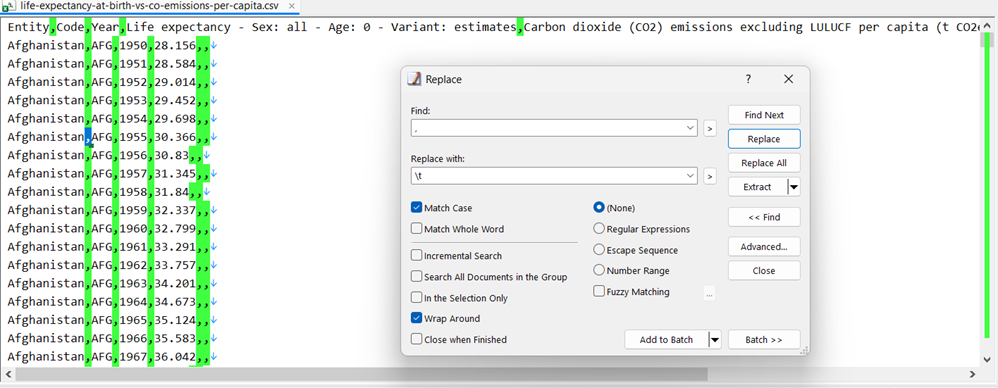


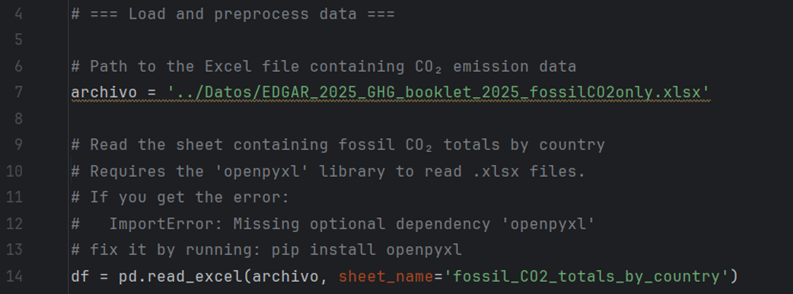
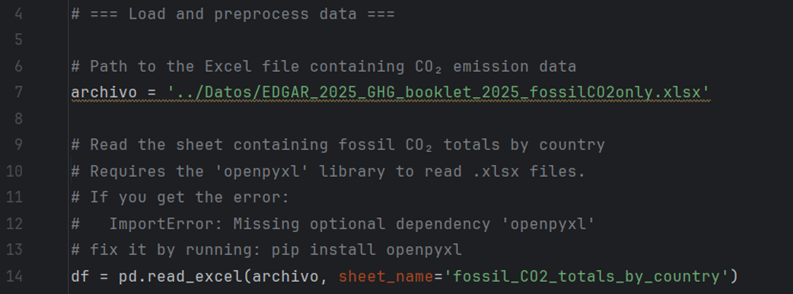
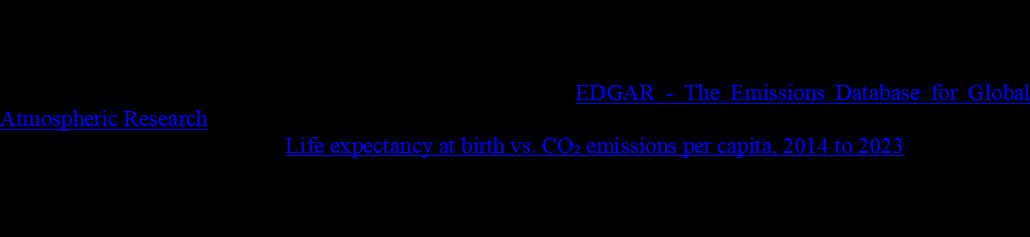

Para la obtención de las graficas se siguieron diferentes tutoriales, entre ellos una pagina que se llama Python Graph Gallery, en esta se suben graficas muy lindas de gente con mas experiencia en los cuales no solo suben el código, sino que con una buena documentación explican cómo se hace.
Además, ellos nos presentan diferentes CheatSheet que sirven para facilitar la vida, las cuales se adjuntaran a la entrega.

Este gráfico ofrece una visión clara de cómo las emisiones han evolucionado desde 1970 hasta 2024. Al observar esta tendencia a largo plazo, podemos entender el impacto de las decisiones políticas, la expansión de las economías emergentes y los avances tecnológicos en las emisiones globales de CO₂. Es fundamental reconocer estas tendencias para poder implementar estrategias efectivas de mitigación y adaptación al cambio climático.

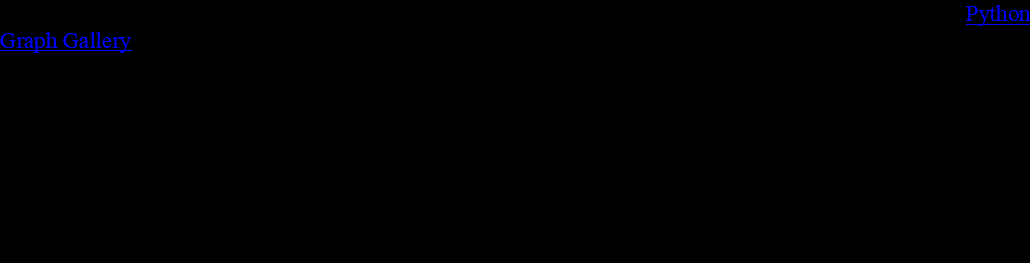

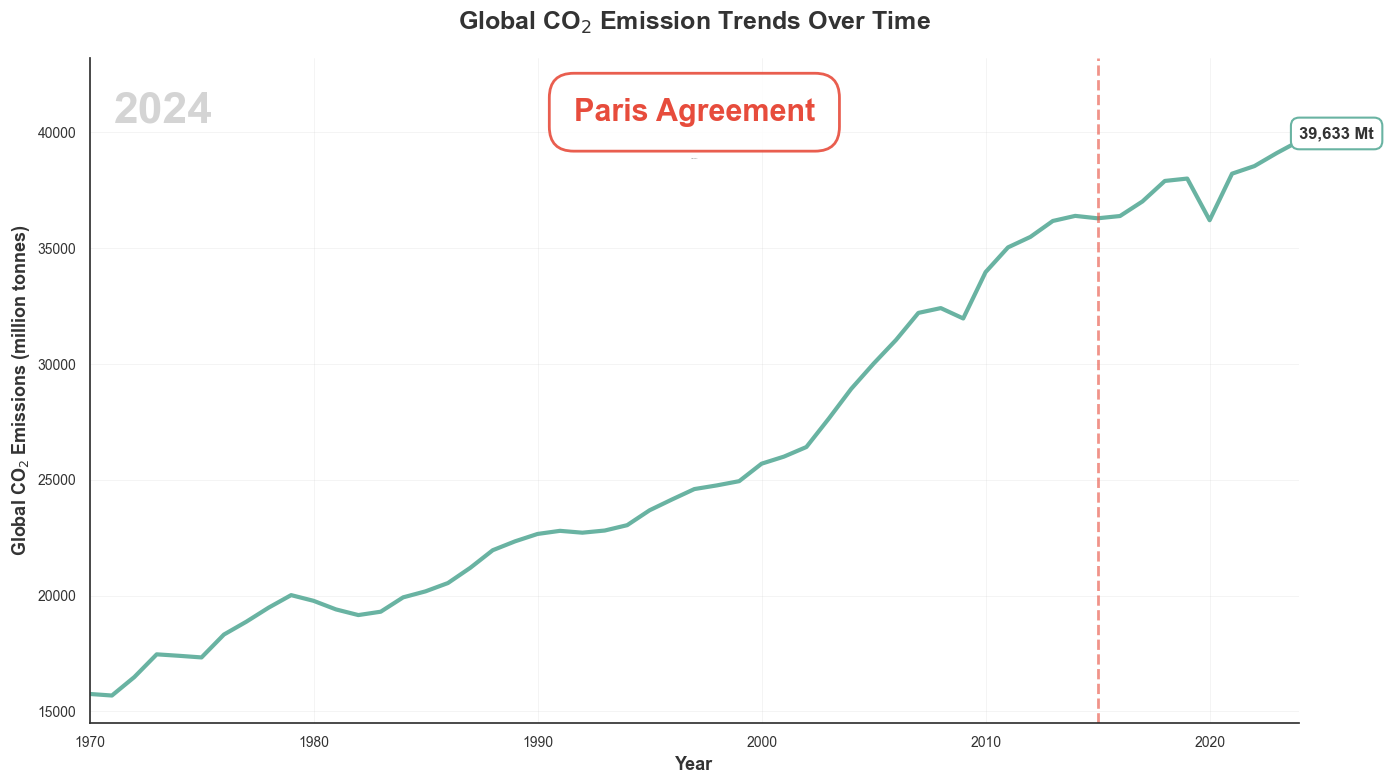

In [40]:
# -------------------------------------------------------------
# IMPORT LIBRARIES
# -------------------------------------------------------------
import pandas as pd                    # Data manipulation and analysis
import matplotlib.pyplot as plt         # Plotting library
import matplotlib.animation as animation # For creating animations
from matplotlib.animation import FuncAnimation # Main function for frame-by-frame animation
import numpy as np                      # Numerical operations
from IPython.display import Image


# -------------------------------------------------------------
# LOAD AND PREPARE DATA
# -------------------------------------------------------------

# Load Excel file (adjust path if necessary)
archivo = '../Datos/EDGAR_2025_GHG_booklet_2025_fossilCO2only.xlsx'
df = pd.read_excel(archivo, sheet_name='fossil_CO2_totals_by_country')

# Select the global total CO₂ emissions row
# Note: row 215 in Excel corresponds to index 213 in pandas (0-based indexing)
fila_co2_global = df.iloc[213]

# Identify year columns (numeric or string digits)
columnas_años = [col for col in df.columns if isinstance(col, (int, float)) or (isinstance(col, str) and col.isdigit())]

# Extract year and CO₂ emission values
años = [int(col) for col in columnas_años]
valores_co2 = [fila_co2_global[col] for col in columnas_años]

# Create a clean DataFrame for animation
df_animation = pd.DataFrame({
    'Año': años,
    'CO2': valores_co2
})

# Sort by year to ensure chronological order
df_animation = df_animation.sort_values('Año').reset_index(drop=True)

# -------------------------------------------------------------
# DEFINE HISTORICAL EVENTS
# -------------------------------------------------------------
# Each event includes its year range and label to be displayed during animation
events = [
    {'year': 1945, 'year_start': 1945, 'year_end': 1960, 'text': 'End of World War II'},
    {'year': 1973, 'year_start': 1973, 'year_end': 1985, 'text': 'Oil Crisis'},
    {'year': 1991, 'year_start': 1991, 'year_end': 2003, 'text': 'End of Cold War'},
    {'year': 1997, 'year_start': 1997, 'year_end': 2009, 'text': 'Kyoto Protocol'},
    {'year': 2001, 'year_start': 2001, 'year_end': 2013, 'text': 'China joins the WTO'},
    {'year': 2015, 'year_start': 2015, 'year_end': 2030, 'text': 'Paris Agreement'},
]

# -------------------------------------------------------------
# FIGURE AND STYLE SETUP
# -------------------------------------------------------------

fig, ax = plt.subplots(figsize=(14, 8))   # Create a large figure
fig.patch.set_facecolor('white')          # Set white background for figure
ax.set_facecolor('white')                 # White background for plot area

# Minimalistic design: remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(colors='#333333', which='both', labelsize=10)

# -------------------------------------------------------------
# INITIAL PLOT ELEMENTS (updated frame-by-frame)
# -------------------------------------------------------------

line, = ax.plot([], [], color='#69b3a2', linewidth=3)  # Main CO₂ line
end_point, = ax.plot([], [], 'o', color='#69b3a2', markersize=10)  # Moving endpoint

# Vertical line and text for historical events
event_vline = ax.axvline(x=0, color='#e74c3c', linestyle='--', linewidth=2, alpha=0)
event_text = ax.text(0.5, 0.94, '', transform=ax.transAxes,
                     fontsize=22, fontweight='bold', color='#e74c3c',
                     ha='center', va='top', alpha=0,
                     bbox=dict(boxstyle='round,pad=0.8', facecolor='white',
                               edgecolor='#e74c3c', linewidth=2, alpha=0))
event_year_text = ax.text(0.5, 0.85, '', transform=ax.transAxes,
                          fontsize=0, color='#555555',
                          ha='center', va='top', alpha=0)

# Text showing the current CO₂ value at the end of the line
value_text = ax.text(0, 0, '', fontsize=12, fontweight='bold',
                     color='#333333', ha='left', va='bottom',
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                               edgecolor='#69b3a2', linewidth=1.5))

# Large year label displayed in the corner
current_year_text = ax.text(0.02, 0.95, '', transform=ax.transAxes,
                            fontsize=32, fontweight='bold', color='#aaaaaa',
                            ha='left', va='top', alpha=0.5)

# -------------------------------------------------------------
# AXES AND STYLE CONFIGURATION
# -------------------------------------------------------------

ax.set_xlim(df_animation['Año'].min(), df_animation['Año'].max())
y_min = df_animation['CO2'].min()
y_max = df_animation['CO2'].max()
y_range = y_max - y_min
ax.set_ylim(y_min - y_range * 0.05, y_max + y_range * 0.15)

ax.set_xlabel('Year', fontsize=13, color='#333333', fontweight='bold')
ax.set_ylabel('Global CO$_2$ Emissions (million tonnes)',
              fontsize=13, color='#333333', fontweight='bold')
ax.set_title('Global CO$_2$ Emission Trends Over Time',
             fontsize=18, color='#333333', fontweight='bold', pad=20)

# Add a subtle grid
ax.grid(True, alpha=0.3, color='#cccccc', linestyle='-', linewidth=0.5)

# -------------------------------------------------------------
# ANIMATION FUNCTIONS
# -------------------------------------------------------------

def init():
    """Initialize the animation with empty elements."""
    line.set_data([], [])
    end_point.set_data([], [])
    event_text.set_text('')
    event_text.set_alpha(0)
    event_year_text.set_text('')
    event_year_text.set_alpha(0)
    value_text.set_text('')
    value_text.set_alpha(0)
    current_year_text.set_text('')
    event_vline.set_alpha(0)
    event_text.get_bbox_patch().set_alpha(0)
    return line, end_point, event_text, event_year_text, value_text, current_year_text, event_vline


def animate(frame):
    """Update all graphical elements for each animation frame."""
    # Progressive line update
    x_data = df_animation['Año'][:frame + 1]
    y_data = df_animation['CO2'][:frame + 1]
    line.set_data(x_data, y_data)

    if frame < len(df_animation):
        current_year = df_animation['Año'].iloc[frame]
        current_value = df_animation['CO2'].iloc[frame]

        # Update endpoint and dynamic text values
        end_point.set_data([current_year], [current_value])
        current_year_text.set_text(f'{int(current_year)}')
        value_text.set_text(f'{current_value:,.0f} Mt')
        value_text.set_position((current_year, current_value))
        value_text.set_alpha(1)

        # Check if a historical event should appear
        event_to_show = None
        for event in events:
            if event['year_start'] <= current_year <= event['year_end']:
                event_to_show = event
                break

        # Display event text with smooth fade in/out
        if event_to_show:
            event_text.set_text(event_to_show['text'])
            event_year_text.set_text(f"Year {event_to_show['year']}")

            # Calculate transparency (alpha) for fade effect
            year_in_range = current_year - event_to_show['year_start']
            year_range = event_to_show['year_end'] - event_to_show['year_start']

            if year_in_range < 5:  # Fade in (first 5 years)
                alpha = year_in_range / 5
            elif year_in_range > year_range - 5:  # Fade out (last 5 years)
                alpha = (event_to_show['year_end'] - current_year) / 5
            else:
                alpha = 1.0  # Fully visible

            # Apply transparency to text and vertical line
            alpha = min(1.0, max(0.0, alpha))
            event_text.set_alpha(alpha)
            event_year_text.set_alpha(alpha)
            event_text.get_bbox_patch().set_alpha(alpha * 0.9)
            event_vline.set_xdata([event_to_show['year'], event_to_show['year']])
            event_vline.set_alpha(alpha * 0.6)
        else:
            # Hide event elements when not active
            event_text.set_alpha(0)
            event_year_text.set_alpha(0)
            event_text.get_bbox_patch().set_alpha(0)
            event_vline.set_alpha(0)

    return line, end_point, event_text, event_year_text, value_text, current_year_text, event_vline

# -------------------------------------------------------------
# CREATE AND SAVE ANIMATION
# -------------------------------------------------------------

frames = len(df_animation)  # Total frames (one per year)
anim = FuncAnimation(fig, animate, init_func=init, frames=frames,
                     interval=100, blit=True, repeat=True)

# Save animation as GIF (requires 'pillow' installed)
anim.save('../Graphs/co2_animation.gif', writer='pillow', fps=10, dpi=200)
Image(filename='../Graphs/co2_animation.gif')

# Display final animation
plt.tight_layout()
plt.show()

In [49]:
import pandas as pd
import plotly.express as px

# === Load and preprocess data ===

# Path to the Excel file containing CO₂ emission data
archivo = '../Datos/EDGAR_2025_GHG_booklet_2025_fossilCO2only.xlsx'

# Read the sheet containing fossil CO₂ totals by country
# Requires the 'openpyxl' library to read .xlsx files.
# If you get the error:
#   ImportError: Missing optional dependency 'openpyxl'
# fix it by running: pip install openpyxl
df = pd.read_excel(archivo, sheet_name='fossil_CO2_totals_by_country')

# === Filter out non-country entries ===
# Exclude global and regional aggregates that could distort the results.
exclusions = ['GLOBAL TOTAL', 'EU27', 'INTERNATIONAL SHIPPING', 'INTERNATIONAL AVIATION']
mask = ~df['Country'].str.upper().isin(exclusions)
df_countries = df[mask].copy()

# === Extract CO₂ emissions for the year 2024 ===
# Some datasets may store column names as strings ("2024") or integers (2024).
year_col = 2024 if 2024 in df_countries.columns else '2024'
df_countries = df_countries[['Country', year_col]].copy()
df_countries.columns = ['Country', 'CO2_2024']

# Keep only positive emission values
df_countries = df_countries[df_countries['CO2_2024'] > 0].dropna()

# === Map countries to continents ===
# This dictionary allows grouping countries by continent for visualization.
continent_map = {
    # North America
    'USA': 'North America', 'UNITED STATES': 'North America', 'UNITED STATES OF AMERICA': 'North America',
    'CANADA': 'North America', 'MEXICO': 'North America',
    'GUATEMALA': 'North America', 'HONDURAS': 'North America', 'EL SALVADOR': 'North America',
    'NICARAGUA': 'North America', 'COSTA RICA': 'North America', 'PANAMA': 'North America',
    'CUBA': 'North America', 'JAMAICA': 'North America', 'HAITI': 'North America',
    'DOMINICAN REPUBLIC': 'North America', 'TRINIDAD AND TOBAGO': 'North America',

    # South America
    'BRAZIL': 'South America', 'ARGENTINA': 'South America', 'CHILE': 'South America',
    'COLOMBIA': 'South America', 'VENEZUELA': 'South America',
    'VENEZUELA (BOLIVARIAN REPUBLIC OF)': 'South America',
    'PERU': 'South America', 'ECUADOR': 'South America', 'BOLIVIA': 'South America',
    'BOLIVIA (PLURINATIONAL STATE OF)': 'South America',
    'PARAGUAY': 'South America', 'URUGUAY': 'South America', 'SURINAME': 'South America',
    'GUYANA': 'South America',

    # Europe
    'GERMANY': 'Europe', 'UNITED KINGDOM': 'Europe', 'FRANCE': 'Europe', 'ITALY': 'Europe',
    'SPAIN': 'Europe', 'POLAND': 'Europe', 'NETHERLANDS': 'Europe', 'BELGIUM': 'Europe',
    'GREECE': 'Europe', 'PORTUGAL': 'Europe', 'AUSTRIA': 'Europe', 'SWEDEN': 'Europe',
    'FINLAND': 'Europe', 'DENMARK': 'Europe', 'NORWAY': 'Europe', 'IRELAND': 'Europe',
    'SWITZERLAND': 'Europe', 'ROMANIA': 'Europe', 'CZECHIA': 'Europe',
    'CZECH REPUBLIC': 'Europe', 'HUNGARY': 'Europe', 'SLOVAKIA': 'Europe',
    'BULGARIA': 'Europe', 'CROATIA': 'Europe', 'SERBIA': 'Europe', 'SLOVENIA': 'Europe',
    'LITHUANIA': 'Europe', 'LATVIA': 'Europe', 'ESTONIA': 'Europe', 'ICELAND': 'Europe',
    'LUXEMBOURG': 'Europe', 'MALTA': 'Europe', 'CYPRUS': 'Europe',
    'ALBANIA': 'Europe', 'NORTH MACEDONIA': 'Europe', 'MONTENEGRO': 'Europe',
    'BOSNIA AND HERZEGOVINA': 'Europe', 'UKRAINE': 'Europe', 'BELARUS': 'Europe',
    'MOLDOVA': 'Europe',

    # Asia
    'CHINA': 'Asia', 'CHINA (MAINLAND)': 'Asia', 'INDIA': 'Asia', 'JAPAN': 'Asia',
    'KOREA (SOUTH)': 'Asia', 'INDONESIA': 'Asia', 'SAUDI ARABIA': 'Asia',
    'IRAN': 'Asia', 'IRAN (ISLAMIC REPUBLIC OF)': 'Asia', 'THAILAND': 'Asia',
    'MALAYSIA': 'Asia', 'SINGAPORE': 'Asia', 'PHILIPPINES': 'Asia', 'VIETNAM': 'Asia',
    'VIET NAM': 'Asia', 'PAKISTAN': 'Asia', 'BANGLADESH': 'Asia', 'IRAQ': 'Asia',
    'UNITED ARAB EMIRATES': 'Asia', 'QATAR': 'Asia', 'KUWAIT': 'Asia', 'OMAN': 'Asia',
    'ISRAEL': 'Asia', 'LEBANON': 'Asia', 'JORDAN': 'Asia', 'SYRIA': 'Asia',
    'YEMEN': 'Asia', 'SRI LANKA': 'Asia', 'MYANMAR': 'Asia', 'CAMBODIA': 'Asia',
    'LAOS': 'Asia', 'NEPAL': 'Asia', 'AFGHANISTAN': 'Asia', 'MONGOLIA': 'Asia',
    'KOREA (NORTH)': 'Asia', 'TAIWAN': 'Asia', 'BAHRAIN': 'Asia', 'BRUNEI': 'Asia',
    'MALDIVES': 'Asia', 'BHUTAN': 'Asia', 'TIMOR-LESTE': 'Asia',
    'AZERBAIJAN': 'Asia', 'ARMENIA': 'Asia', 'GEORGIA': 'Asia',
    'KAZAKHSTAN': 'Asia', 'UZBEKISTAN': 'Asia', 'TURKMENISTAN': 'Asia',
    'KYRGYZSTAN': 'Asia', 'TAJIKISTAN': 'Asia',

    # Africa
    'SOUTH AFRICA': 'Africa', 'EGYPT': 'Africa', 'NIGERIA': 'Africa', 'ALGERIA': 'Africa',
    'MOROCCO': 'Africa', 'LIBYA': 'Africa', 'TUNISIA': 'Africa', 'KENYA': 'Africa',
    'ETHIOPIA': 'Africa', 'GHANA': 'Africa', 'ANGOLA': 'Africa', 'SUDAN': 'Africa',
    'TANZANIA': 'Africa', 'TANZANIA (UNITED REPUBLIC OF)': 'Africa',
    'CAMEROON': 'Africa', 'UGANDA': 'Africa', 'ZIMBABWE': 'Africa', 'ZAMBIA': 'Africa',
    'SENEGAL': 'Africa', 'MOZAMBIQUE': 'Africa', 'MADAGASCAR': 'Africa',
    'CÔTE D\'IVOIRE': 'Africa', 'MALI': 'Africa', 'BURKINA FASO': 'Africa',
    'NIGER': 'Africa', 'MALAWI': 'Africa', 'GUINEA': 'Africa', 'RWANDA': 'Africa',
    'BENIN': 'Africa', 'BURUNDI': 'Africa', 'CHAD': 'Africa', 'SOMALIA': 'Africa',
    'CONGO': 'Africa', 'CONGO (DEMOCRATIC REPUBLIC OF THE)': 'Africa',
    'GABON': 'Africa', 'MAURITANIA': 'Africa', 'NAMIBIA': 'Africa', 'BOTSWANA': 'Africa',
    'MAURITIUS': 'Africa', 'TOGO': 'Africa', 'SIERRA LEONE': 'Africa', 'LIBERIA': 'Africa',

    # Oceania
    'AUSTRALIA': 'Oceania', 'NEW ZEALAND': 'Oceania', 'PAPUA NEW GUINEA': 'Oceania',
    'FIJI': 'Oceania',

    # Russia (classified as Europe for simplicity)
    'RUSSIA': 'Europe', 'RUSSIAN FEDERATION': 'Europe', 'TURKEY': 'Europe'
}

# Convert country names to uppercase and map to continents
df_countries['Country_Upper'] = df_countries['Country'].str.upper().str.strip()
df_countries['Continent'] = df_countries['Country_Upper'].map(continent_map)

# Debug: identify any countries missing a continent assignment
missing = df_countries[df_countries['Continent'].isna()]
if len(missing) > 0:
    print("\nCountries without continent mapping:")
    print(missing[['Country', 'Country_Upper', 'CO2_2024']].head(20))

# Keep only countries with assigned continents
df_countries = df_countries[df_countries['Continent'].notna()].copy()

# === Summary statistics ===
print(f"\nProcessed countries: {len(df_countries)}")
print("\nTop 10 emitters:")
print(df_countries.nlargest(10, 'CO2_2024')[['Country', 'Continent', 'CO2_2024']])

# Compute global total and share per country
total_global = df_countries['CO2_2024'].sum()
df_countries['Percentage'] = (df_countries['CO2_2024'] / total_global) * 100

# Aggregate by continent
continent_totals = df_countries.groupby('Continent')['CO2_2024'].sum().reset_index()
continent_totals['Cont_Percentage'] = (continent_totals['CO2_2024'] / total_global) * 100


# === Label customization for better treemap readability ===
df_countries['Label'] = df_countries.apply(
    lambda x: f"{x['Country']}<br>{x['CO2_2024']:.0f} Mt<br>{x['Percentage']:.1f}%"
    if x['Percentage'] > 1.0 else
    f"{x['Country']}" if x['Percentage'] > 0.3 else "",
    axis=1
)

# === Color mapping for continents ===
continent_colors = {
    'North America': '#2ecc71',  # Green
    'South America': '#27ae60',  # Dark green
    'Europe': '#f39c12',         # Orange
    'Asia': '#e74c3c',           # Red
    'Africa': '#3498db',         # Blue
    'Oceania': '#9b59b6'         # Purple
}

df_countries['Color'] = df_countries['Continent'].map(continent_colors)

# === Build the Treemap using Plotly Express ===
fig = px.treemap(
    df_countries,
    path=['Continent', 'Country'],
    values='CO2_2024',
    color='Continent',
    color_discrete_map=continent_colors,
    custom_data=['CO2_2024', 'Percentage', 'Country']
)

# === Customize treemap text and hover info ===
fig.update_traces(
    textposition='middle center',
    texttemplate='%{customdata[2]}<br><b>%{customdata[0]:.0f} Mt</b><br>%{customdata[1]:.1f}%',
    textfont=dict(size=11, color='white', family='Arial, sans-serif'),
    hovertemplate='<b>%{customdata[2]}</b><br>CO₂: %{customdata[0]:,.0f} Mt<br>%{customdata[1]:.2f}% of global emissions<extra></extra>',
    marker=dict(
        line=dict(width=2, color='white'),
        pad=dict(t=30, l=5, r=5, b=5)
    )
)

# === Layout settings for appearance and readability ===
fig.update_layout(
    title={
        'text': 'Who has contributed most to global CO₂ emissions?<br><sub>CO₂ emissions in 2024 (million tonnes)</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 28, 'color': '#2C3E50', 'family': 'Arial'}
    },
    width=1400,
    height=800,
    paper_bgcolor='white',
    font=dict(family='Arial', size=14)
)

# === Export interactive chart as HTML ===
fig.write_html('../Graphs/co2_treemap_2024_v1.html')
from IPython.display import HTML

HTML(fig.to_html(include_plotlyjs='cdn', full_html=False))


# Show in browser / interactive window
fig.show()


Countries without continent mapping:
                             Country                     Country_Upper  \
0                              Aruba                             ARUBA   
3                           Anguilla                          ANGUILLA   
6                            Curaçao                           CURAÇAO   
10               Antigua and Barbuda               ANTIGUA AND BARBUDA   
21                           Bahamas                           BAHAMAS   
24                            Belize                            BELIZE   
25                           Bermuda                           BERMUDA   
28                          Barbados                          BARBADOS   
32          Central African Republic          CENTRAL AFRICAN REPUBLIC   
34     Switzerland and Liechtenstein     SWITZERLAND AND LIECHTENSTEIN   
37                     Côte d’Ivoire                     CÔTE D’IVOIRE   
39  Democratic Republic of the Congo  DEMOCRATIC REPUBLIC OF THE CONGO   


Después de analizar las emisiones globales de CO₂ por país, es importante comprender qué sectores económicos son los principales responsables de estas emisiones. Las actividades industriales, el transporte y la generación de energía eléctrica continúan siendo los mayores contribuyentes a nivel mundial. A lo largo del período comprendido entre 2015 y 2024, se observa un crecimiento sostenido en casi todos los sectores, impulsado por el aumento de la demanda energética, el desarrollo urbano y la expansión del transporte.
Aunque algunos sectores, como los procesos industriales y la agricultura, mantienen niveles más estables, el sector energético (particularmente la generación de electricidad a partir de combustibles fósiles) sigue siendo el mayor responsable del aumento global de CO₂. Este análisis permite identificar las áreas prioritarias donde deben enfocarse las políticas de descarbonización y transición hacia energías limpias.


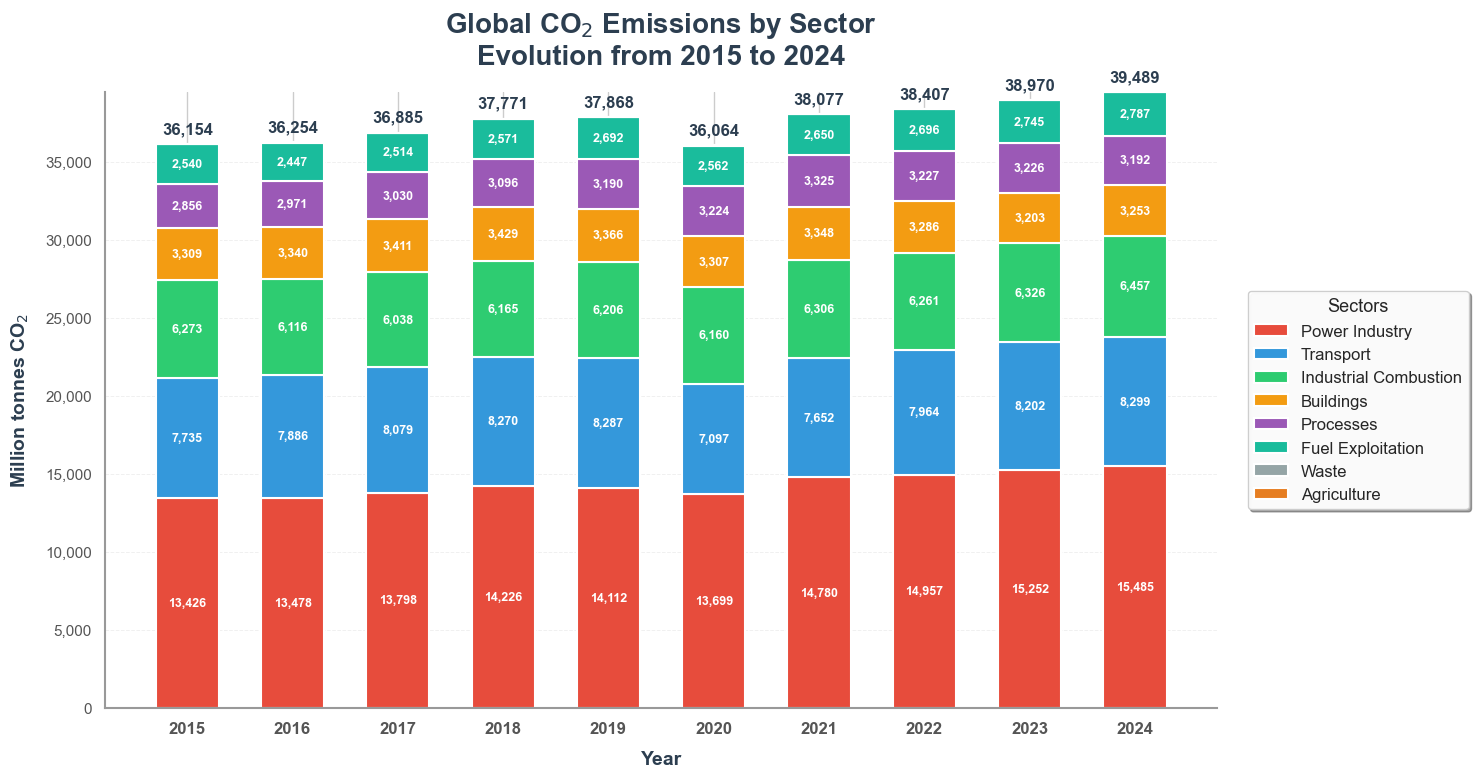

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file
archivo = '../Datos/EDGAR_2025_GHG_booklet_2025_fossilCO2only.xlsx'

# Read the "fossil_CO2_by_sector_country_su" sheet
df_sectores = pd.read_excel(archivo, sheet_name='fossil_CO2_by_sector_country_su')

# Extract rows 1462 to 1469 (indices 1461 to 1468 in pandas)
df_sectores_filtrado = df_sectores.iloc[1461:1469]

# Last 10 years to analyze
ultimos_10_años = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Define the order of sectors (bottom to top in the stacked bar)
sector_order = [
    'Power Industry',
    'Transport',
    'Industrial Combustion',
    'Buildings',
    'Processes',
    'Fuel Exploitation',
    'Waste',
    'Agriculture'
]

# Assign colors for each sector
colors = {
    'Power Industry': '#e74c3c',  # Red
    'Transport': '#3498db',  # Blue
    'Industrial Combustion': '#2ecc71',  # Green
    'Buildings': '#f39c12',  # Orange
    'Processes': '#9b59b6',  # Purple
    'Fuel Exploitation': '#1abc9c',  # Teal
    'Waste': '#95a5a6',  # Gray
    'Agriculture': '#e67e22',  # Dark orange
}

# Prepare data matrix for stacked bar plot
data_matrix = []

for sector in sector_order:
    sector_values = []
    for year in ultimos_10_años:
        # Find the row for this sector
        sector_row = df_sectores_filtrado[df_sectores_filtrado['Sector'] == sector]
        if not sector_row.empty and year in sector_row.columns:
            value = sector_row[year].values[0]
            if pd.notna(value) and value > 0:
                sector_values.append(value)
            else:
                sector_values.append(0)
        else:
            sector_values.append(0)
    data_matrix.append(sector_values)

# Convert to DataFrame for easier manipulation
df_plot = pd.DataFrame(data_matrix, index=sector_order, columns=ultimos_10_años).T

# Calculate totals per year
totals = df_plot.sum(axis=1)

# Create figure with extra space for legend
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

# Create stacked bar plot
bottom = np.zeros(len(ultimos_10_años))
bar_width = 0.6

for sector in sector_order:
    values = df_plot[sector].values
    bars = ax.bar(
        ultimos_10_años,
        values,
        bar_width,
        bottom=bottom,
        label=sector,
        color=colors[sector],
        edgecolor='white',
        linewidth=1.5
    )

    # Add text labels for larger segments (>5% of total)
    for i, (year, value) in enumerate(zip(ultimos_10_años, values)):
        if value > 0:
            percentage = (value / totals.iloc[i]) * 100
            if percentage > 5:  # Only label significant segments
                text_y = bottom[i] + value / 2
                ax.text(
                    year, text_y,
                    f'{int(value):,}',
                    ha='center', va='center',
                    fontsize=9, fontweight='bold',
                    color='white'
                )

    bottom += values

# Add total values on top of each bar
for i, (year, total) in enumerate(zip(ultimos_10_años, totals)):
    ax.text(
        year, total + 500,
        f'{int(total):,}',
        ha='center', va='bottom',
        fontsize=12, fontweight='bold',
        color='#2C3E50'
    )

# Customize axes
ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='#2C3E50', labelpad=10)
ax.set_ylabel('Million tonnes CO$_2$', fontsize=14, fontweight='bold', color='#2C3E50', labelpad=10)
ax.set_title('Global CO$_2$ Emissions by Sector\nEvolution from 2015 to 2024',
             fontsize=20, fontweight='bold', color='#2C3E50', pad=20)

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
ax.tick_params(axis='both', labelsize=11, colors='#555555')

# Set x-axis ticks
ax.set_xticks(ultimos_10_años)
ax.set_xticklabels(ultimos_10_años, fontsize=12, fontweight='600')

# Grid
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7, color='#cccccc')
ax.set_axisbelow(True)

# Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#999999')
ax.spines['bottom'].set_color('#999999')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Legend - positioned outside to the right
legend = ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    ncol=1,
    frameon=True,
    fontsize=12,
    title='Sectors',
    title_fontsize=13,
    edgecolor='#cccccc',
    fancybox=True,
    shadow=True
)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)

# Adjust layout to accommodate legend
plt.subplots_adjust(right=0.82)

# Save figure
plt.savefig('../Graphs/co2_stacked_barplot.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')

plt.show()



C:\Users\samue\AppData\Local\Temp\ipykernel_7728\1596972089.py:229: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

G:\Mi unidad\Unal Asignaturas\2025-2\Fundamentos de programacion\Entrega2_Restrepo_Buritica_Samuel\Jupyter\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



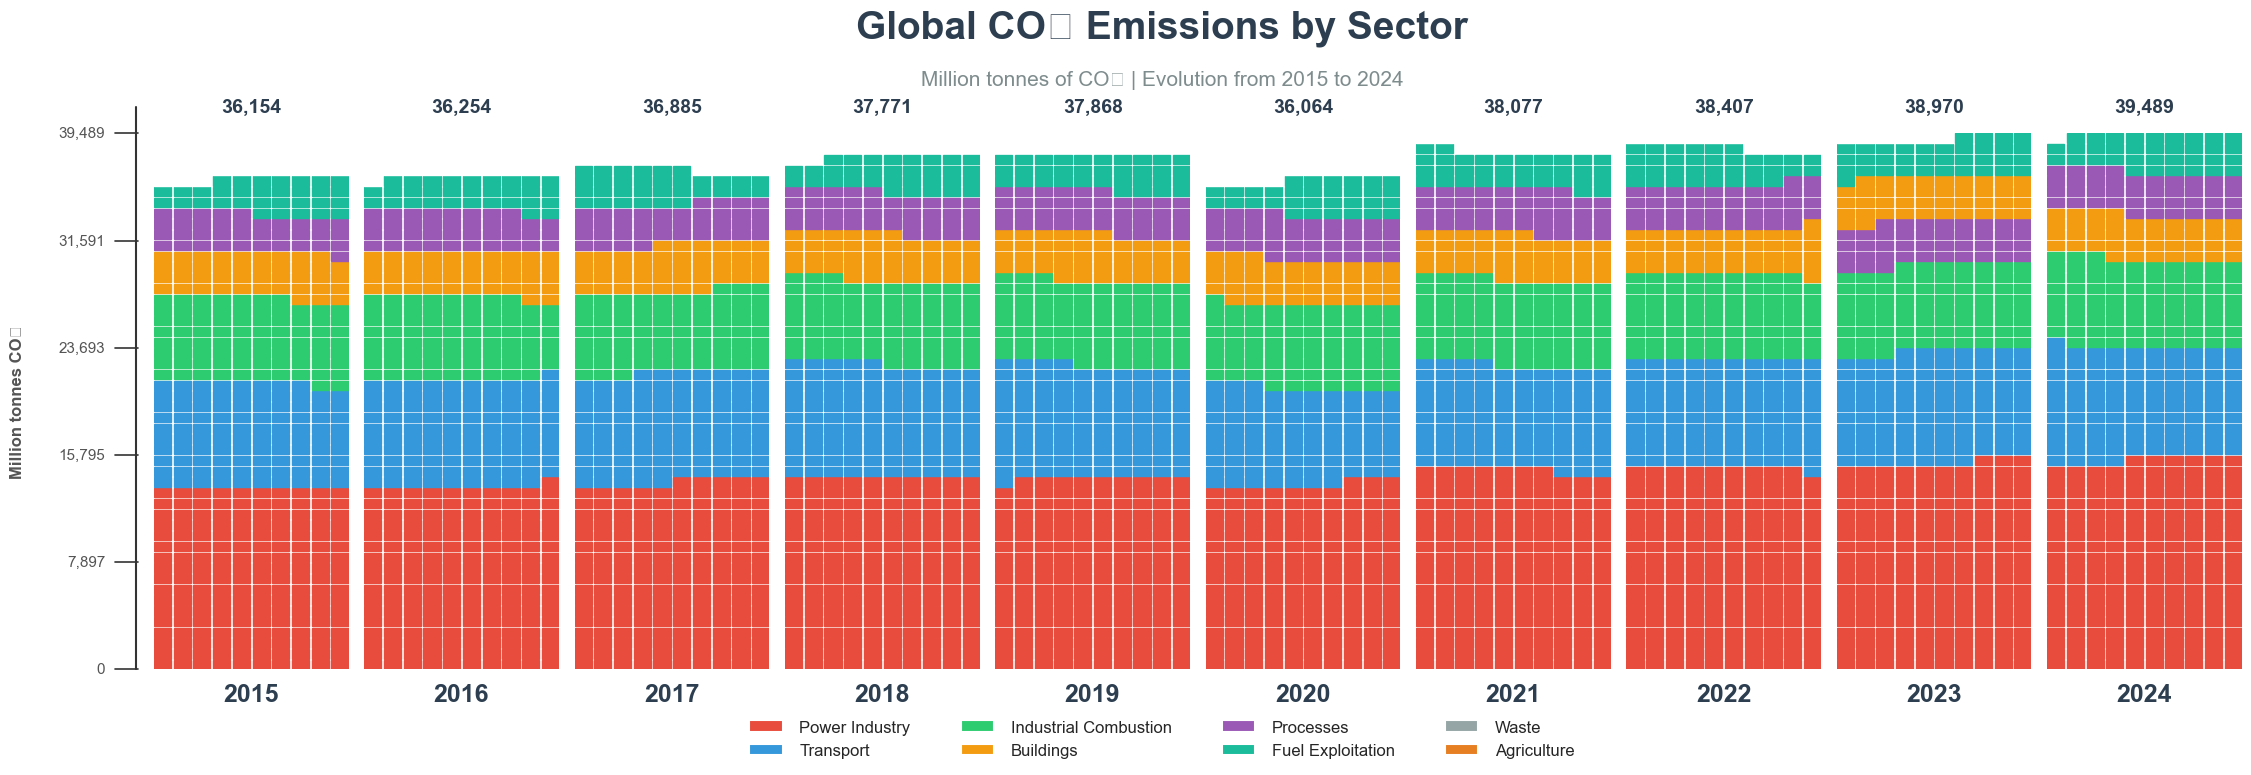

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import numpy as np
import matplotlib.patches as mpatches

# Read the Excel file
# If you get an error like:
#   ImportError: Missing optional dependency 'openpyxl'
# it means you need to install the openpyxl library.
# Solution: open the terminal in your virtual environment and run:
#     pip install openpyxl
# or if you use conda:
#     conda install openpyxl
# After installing it, rerun the code and it should work fine.
archivo = '../Datos/EDGAR_2025_GHG_booklet_2025_fossilCO2only.xlsx'

# Read the "fossil_CO2_by_sector_country_su" sheet
df_sectores = pd.read_excel(archivo, sheet_name='fossil_CO2_by_sector_country_su')

# Extract rows 1462 to 1469 (indices 1461 to 1468 in pandas, since it starts from 0)
df_sectores_filtrado = df_sectores.iloc[1461:1469]

# Last 10 years to analyze
ultimos_10_años = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Define the order of sectors for consistency in plots
sector_order = [
    'Power Industry',
    'Transport',
    'Industrial Combustion',
    'Buildings',
    'Processes',
    'Fuel Exploitation',
    'Waste',
    'Agriculture'
]

# Assign colors for each sector
colors = [
    '#e74c3c',  # Power Industry - Red
    '#3498db',  # Transport - Blue
    '#2ecc71',  # Industrial Combustion - Green
    '#f39c12',  # Buildings - Orange
    '#9b59b6',  # Processes - Purple
    '#1abc9c',  # Fuel Exploitation - Teal
    '#95a5a6',  # Waste - Gray
    '#e67e22',  # Agriculture - Dark orange
]

# Prepare aggregated data by year
data_by_year = []

for year in ultimos_10_años:
    year_dict = {'year': year}
    total_year = 0

    # Iterate through filtered rows and extract CO2 values for each sector
    for _, row in df_sectores_filtrado.iterrows():
        sector_name = row['Sector']
        if sector_name in sector_order:
            try:
                value = float(row[year])
                if pd.notna(value) and value > 0:
                    year_dict[sector_name] = value
                    total_year += value
                else:
                    year_dict[sector_name] = 0
            except Exception as e:
                print(f"Error reading {sector_name} for year {year}: {e}")
                year_dict[sector_name] = 0

    # Add the total emissions for that year
    year_dict['total'] = total_year
    data_by_year.append(year_dict)

# Create aggregated DataFrame
df_agg = pd.DataFrame(data_by_year)


# Find the maximum total emissions to scale the waffle charts
max_year_value = df_agg['total'].max()

# Create the figure layout with proper spacing
ncols = len(ultimos_10_años)
fig = plt.figure(figsize=(24, 8))
fig.patch.set_facecolor('white')

# Use gridspec for better subplot layout control
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, ncols, figure=fig,
                       left=0.08, right=0.95,
                       bottom=0.15, top=0.82,
                       wspace=0.08)

axs = [fig.add_subplot(gs[0, i]) for i in range(ncols)]

# Create waffle charts for each year
for idx, (year, ax) in enumerate(zip(ultimos_10_años, axs)):
    # Extract emission data for that year in the defined order
    year_data = df_agg[df_agg['year'] == year].iloc[0]

    values = []
    sector_names = []
    for sector in sector_order:
        if sector in year_data and year_data[sector] > 0:
            values.append(year_data[sector])
            sector_names.append(sector)

    # Sort values in descending order
    sorted_indices = sorted(range(len(values)), key=lambda i: values[i], reverse=True)
    values = [values[i] for i in sorted_indices]

    # Compute total emissions for this year
    total_current = sum(values)

    # Add white filler to reach the same height as the maximum year
    values.append(max_year_value - total_current)

    # Sort colors to match values
    current_colors = [colors[sector_order.index(sector_names[i])] for i in sorted_indices]
    current_colors.append('white')

    # Create the waffle plot
    try:
        Waffle.make_waffle(
            ax=ax,
            rows=50,
            columns=10,
            values=values,
            vertical=True,
            colors=current_colors,
            block_arranging_style='snake',
            starting_location='SW',
            rounding_rule='nearest',
            interval_ratio_x=0.15,
            interval_ratio_y=0.15
        )
    except Exception as e:
        print(f"Error creating waffle for year {year}: {e}")
        continue

    # Add the year label below
    ax.text(x=0.5, y=-0.06, s=f"{int(year)}",
            fontsize=18, ha="center", fontweight='bold',
            transform=ax.transAxes, color='#2C3E50')

    # Add total emission value above
    ax.text(x=0.5, y=1.04, s=f"{int(total_current):,}",
            fontsize=14, ha="center", fontweight='bold',
            transform=ax.transAxes, color='#2C3E50')

    # Remove default spines for a cleaner look
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Hide x and y ticks
    ax.set_xticks([])
    ax.tick_params(axis='x', length=0)
    ax.set_yticks([])

# Add custom Y-axis to the first subplot
num_y_ticks = 6
y_tick_values = np.linspace(0, max_year_value, num_y_ticks)
y_tick_values = [int(val) for val in y_tick_values]

for y_tick in y_tick_values:
    # Add tick label
    axs[0].text(
        x=-0.25,
        y=y_tick / max_year_value,
        s=f"{y_tick:,}",
        size=11,
        va="center",
        ha="right",
        transform=axs[0].transAxes,
        color='#555555'
    )
    # Add small tick mark
    axs[0].axhline(
        y=y_tick / max_year_value,
        xmin=-0.20,
        xmax=-0.08,
        clip_on=False,
        color="#333333",
        linewidth=1.2,
    )

# Add vertical Y-axis line
axs[0].axvline(x=-0.018, ymin=0, ymax=1.05, clip_on=False,
               color="#333333", linewidth=1.5)

# Add Y-axis label
axs[0].text(
    x=-0.70,
    y=0.5,
    s='Million tonnes CO₂',
    rotation=90,
    va='center',
    ha='center',
    fontsize=12,
    color='#555555',
    fontweight='600',
    transform=axs[0].transAxes
)

# Add main title and subtitle
fig.text(0.5, 0.94, 'Global CO₂ Emissions by Sector',
         ha='center', fontsize=28, fontweight='bold', color='#2C3E50')

fig.text(0.5, 0.88, 'Million tonnes of CO₂ | Evolution from 2015 to 2024',
         ha='center', fontsize=15, color='#7F8C8D')

# Create and add improved manual legend
legend_elements = []
for i, sector in enumerate(sector_order):
    legend_elements.append(
        mpatches.Patch(facecolor=colors[i], edgecolor='white',
                       linewidth=1.5, label=sector)
    )

fig.legend(handles=legend_elements,
           loc='lower center', ncol=4, frameon=False,
           fontsize=12, bbox_to_anchor=(0.5, 0.02),
           columnspacing=3, handlelength=2, handletextpad=1)

# Save the final plot
plt.savefig('../Graphs/co2_sectores_waffle.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none', pad_inches=0.4)

# Show the figure
plt.show()


Al analizar las emisiones de CO₂ a nivel global, es crucial también entender cómo se distribuyen estas emisiones entre los continentes. En 2024, la mayor parte de las emisiones globales provienen de Asia, lo que refleja el peso de economías industriales como China, que sigue siendo el mayor emisor mundial. En contraste, África y América del Sur representan una porción mucho menor, a pesar de sus contribuciones crecientes debido al desarrollo económico y el aumento de las actividades industriales. Este gráfico ayuda a visualizar la disparidad en las emisiones entre continentes, lo cual es esencial para diseñar políticas específicas y estrategias de reducción de emisiones en diferentes regiones.
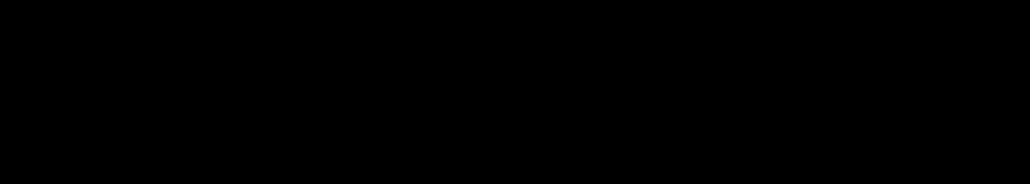

C:\Users\samue\AppData\Local\Temp\ipykernel_7728\361401703.py:105: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\samue\AppData\Local\Temp\ipykernel_7728\361401703.py:136: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\samue\AppData\Local\Temp\ipykernel_7728\361401703.py:139: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

G:\Mi unidad\Unal Asignaturas\2025-2\Fundamentos de programacion\Entrega2_Restrepo_Buritica_Samuel\Jupyter\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



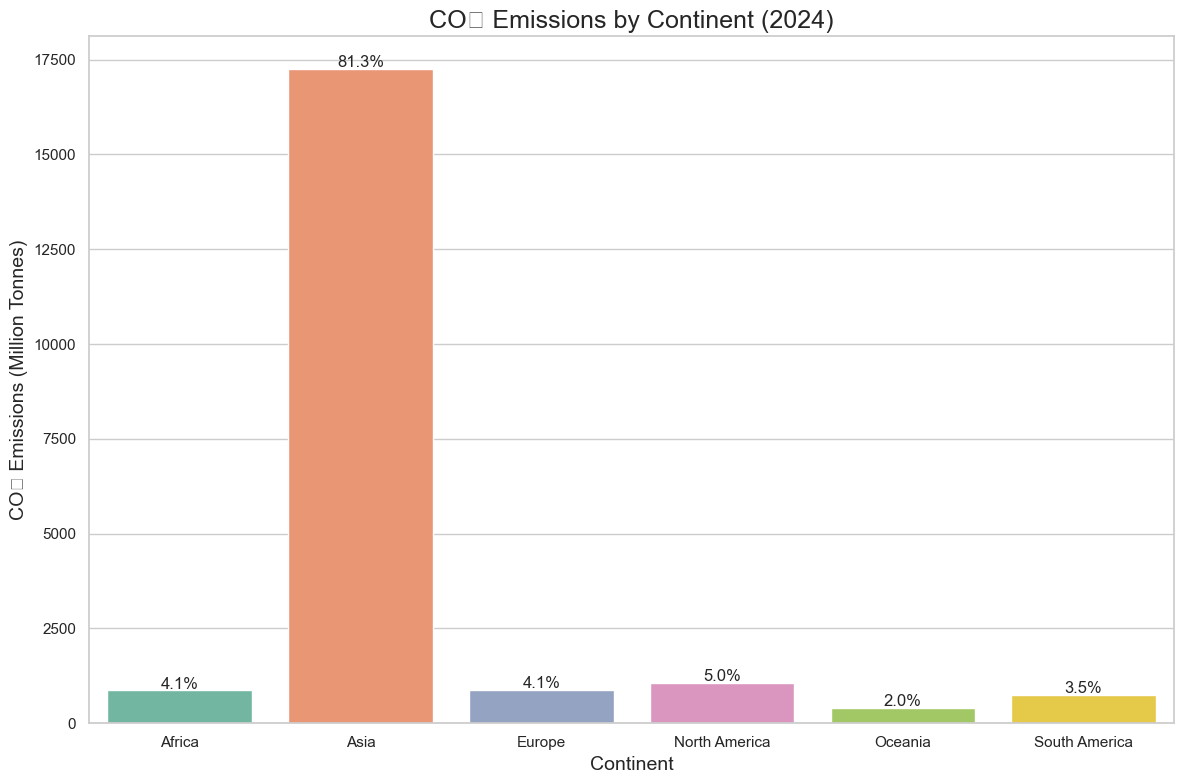

In [44]:

# --------------------------------------------------------------
# Import required libraries
# --------------------------------------------------------------
import pandas as pd          # For structured data handling and analysis
import numpy as np           # For numerical computations
import matplotlib.pyplot as plt  # For creating plots and figures
import seaborn as sns        # For enhanced, high-level visualization

# --------------------------------------------------------------
# Load the dataset
# --------------------------------------------------------------
# The Excel file is part of the EDGAR (Emissions Database for Global Atmospheric Research)
# global greenhouse gas dataset. It contains CO₂ emission totals by country.
archivo = '../Datos/EDGAR_2025_GHG_booklet_2025_fossilCO2only.xlsx'

# Read the worksheet containing total fossil CO₂ emissions by country
df = pd.read_excel(archivo, sheet_name='fossil_CO2_totals_by_country')

# --------------------------------------------------------------
# Data Cleaning — Exclude aggregated or non-country entries
# --------------------------------------------------------------
# The dataset includes global and regional aggregates (e.g., "GLOBAL TOTAL",
# "EU27", "INTERNATIONAL SHIPPING", "INTERNATIONAL AVIATION") that should
# be excluded to focus only on national-level data.
exclusions = ['GLOBAL TOTAL', 'EU27', 'INTERNATIONAL SHIPPING', 'INTERNATIONAL AVIATION']

# Create a Boolean mask to keep only country-level rows
mask = ~df['Country'].str.upper().isin(exclusions)

# Apply the mask and create a clean copy of the DataFrame
df_countries = df[mask].copy()

# --------------------------------------------------------------
# Extract 2024 CO₂ emission values
# --------------------------------------------------------------
# Ensure that the dataset contains a column for the year 2024.
# Depending on how the data was exported, the column name might be
# stored as either an integer or a string, so this code handles both cases.
year_col = 2024 if 2024 in df_countries.columns else '2024'

# Select only the country name and the corresponding 2024 emission value
df_countries = df_countries[['Country', year_col]].copy()
df_countries.columns = ['Country', 'CO2_2024']

# --------------------------------------------------------------
# Filter out invalid or missing emission values
# --------------------------------------------------------------
# Keep only records with positive (non-zero) CO₂ emission values
df_countries = df_countries[df_countries['CO2_2024'] > 0].dropna()

# --------------------------------------------------------------
# Map each country to its corresponding continent
# --------------------------------------------------------------
# The EDGAR dataset does not provide continent classification directly,
# so we manually define a mapping for representative countries.
# This mapping can be extended or automated in future versions
# using a standardized country-to-continent dataset.
continent_map = {
    'USA': 'North America', 'CANADA': 'North America', 'MEXICO': 'North America',
    'BRAZIL': 'South America', 'ARGENTINA': 'South America', 'CHILE': 'South America',
    'GERMANY': 'Europe', 'UNITED KINGDOM': 'Europe', 'FRANCE': 'Europe',
    'CHINA': 'Asia', 'INDIA': 'Asia', 'JAPAN': 'Asia',
    'SOUTH AFRICA': 'Africa', 'EGYPT': 'Africa', 'NIGERIA': 'Africa',
    'AUSTRALIA': 'Oceania', 'NEW ZEALAND': 'Oceania'
}

# Convert all country names to uppercase and trim extra spaces
df_countries['Country_Upper'] = df_countries['Country'].str.upper().str.strip()

# Map each country to its continent using the dictionary above
df_countries['Continent'] = df_countries['Country_Upper'].map(continent_map)

# --------------------------------------------------------------
# Filter out countries with no continent assigned
# --------------------------------------------------------------
# Some countries may not appear in the manual mapping above.
# These are excluded from the analysis to ensure consistency.
df_countries = df_countries[df_countries['Continent'].notna()].copy()

# --------------------------------------------------------------
# Aggregate total CO₂ emissions by continent
# --------------------------------------------------------------
# Group all countries belonging to the same continent
# and sum their emission values to obtain continental totals.
continent_totals = (
    df_countries
    .groupby('Continent')['CO2_2024']
    .sum()
    .reset_index()
)

# Calculate the relative contribution (%) of each continent
continent_totals['Percentage'] = (
    continent_totals['CO2_2024'] /
    continent_totals['CO2_2024'].sum()
) * 100

# --------------------------------------------------------------
# Visualization — Bar Plot of CO₂ Emissions by Continent
# --------------------------------------------------------------
plt.figure(figsize=(12, 8))

# Create a color-coded bar chart using Seaborn
# Each bar represents the total CO₂ emissions for a continent in 2024.
sns.barplot(
    x='Continent',
    y='CO2_2024',
    data=continent_totals,
    palette='Set2'
)

# --------------------------------------------------------------
# Add descriptive labels and title
# --------------------------------------------------------------
plt.title('CO₂ Emissions by Continent (2024)', fontsize=18)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('CO₂ Emissions (Million Tonnes)', fontsize=14)

# --------------------------------------------------------------
# Annotate each bar with its percentage contribution
# --------------------------------------------------------------
# Place the text label slightly above each bar to indicate
# the share (%) of global emissions for that continent.
for i, row in continent_totals.iterrows():
    plt.text(
        i,                             # X position (bar index)
        row['CO2_2024'] + 50,          # Y position (slightly above bar height)
        f"{row['Percentage']:.1f}%",   # Text showing percentage with one decimal
        ha='center', fontsize=12
    )

# --------------------------------------------------------------
# Final adjustments and export
# --------------------------------------------------------------
plt.xticks(rotation=0)   # Keep x-axis labels horizontal
plt.tight_layout()       # Optimize spacing to prevent label overlap

# Save the figure as a high-resolution PNG
plt.savefig(
    "../Graphs/CO2_Emissions_by_Continent_(2024)",
    dpi=300,
    bbox_inches="tight"
)

# Display the final chart
plt.show()


Además de la distribución de las emisiones de CO₂ a nivel global y por sectores, es crucial entender la relación entre las emisiones per cápita de CO₂ y el desarrollo humano, específicamente la esperanza de vida. El gráfico siguiente muestra cómo, en general, los países con mayores emisiones de CO₂ per cápita tienden a tener una mayor esperanza de vida. Esto refleja la correlación entre el desarrollo económico, la disponibilidad de recursos y los niveles de calidad de vida en países de mayor ingreso. Sin embargo, también se observa que algunos países con menores emisiones per cápita, particularmente en África y Asia, tienen una esperanza de vida más baja. Esta relación subraya cómo las decisiones económicas y ambientales impactan directamente la salud y bienestar de las poblaciones.

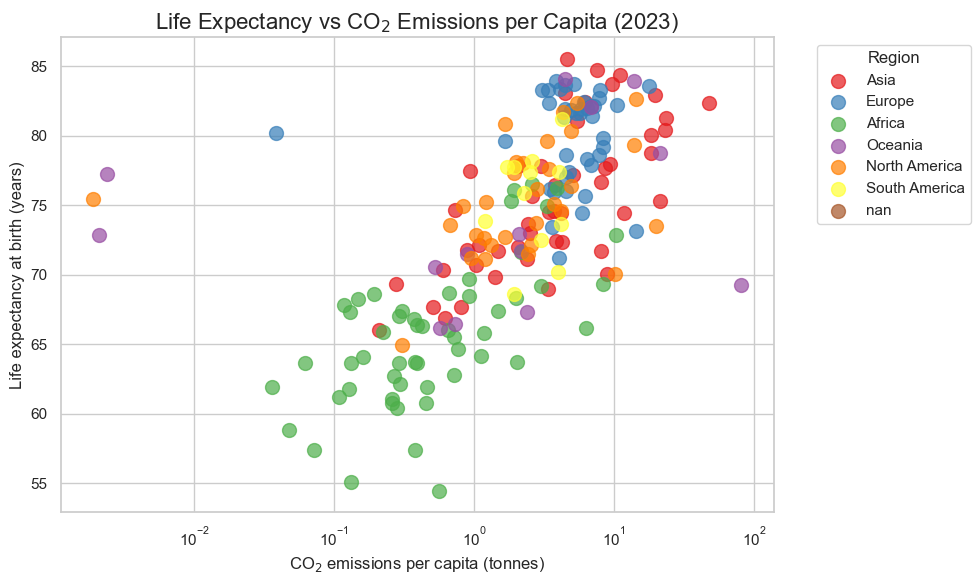

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------------------
# Load the dataset
# --------------------------------------------------------------
# The dataset comes from Our World in Data (OWID) and contains
# information on life expectancy and CO₂ emissions per capita.
# It is used to explore potential correlations between human
# development (life expectancy) and carbon emissions.
input_file_path = '../Datos/life-expectancy-at-birth-vs-co-emissions-per-capita.xlsx'

# Read the Excel sheet containing life expectancy vs CO₂ emissions data
df = pd.read_excel(input_file_path, sheet_name='life-expectancy-at-birth-vs-co-')

# --------------------------------------------------------------
# Filter data for the most recent year (2023)
# --------------------------------------------------------------
df_2023 = df[df['Year'] == 2023]

# --------------------------------------------------------------
# Select relevant columns
# --------------------------------------------------------------
# Keep only the variables of interest:
#   - Country (Entity)
#   - Life expectancy at birth
#   - CO₂ emissions per capita (in tonnes)
#   - Geographical region (as classified by OWID)
df_2023 = df_2023[[
    'Entity',
    'Life expectancy - Sex: all - Age: 0 - Variant: estimates',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'World regions according to OWID'
]]

# --------------------------------------------------------------
# Rename columns for clarity
# --------------------------------------------------------------
df_2023 = df_2023.rename(columns={
    'Entity': 'Country',
    'Life expectancy - Sex: all - Age: 0 - Variant: estimates': 'Life expectancy',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)': 'CO2 emissions per capita',
    'World regions according to OWID': 'Region'
})

# --------------------------------------------------------------
# Remove missing or invalid data
# --------------------------------------------------------------
# Any row that lacks data for life expectancy or CO₂ emissions
# is excluded to ensure reliable analysis and visualization.
df_2023 = df_2023.dropna(subset=['Life expectancy', 'CO2 emissions per capita'])

# (This redundant assignment is retained for consistency, though it has no effect)
df_2023['Life expectancy'] = df_2023['Life expectancy']

# --------------------------------------------------------------
# Define a color palette for world regions
# --------------------------------------------------------------
# A distinct color is assigned to each world region to improve
# readability of the scatter plot.
region_colors = sns.color_palette("Set1", len(df_2023['Region'].unique()))

# --------------------------------------------------------------
# Create the scatter plot
# --------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot one group (region) at a time with a different color
for i, region in enumerate(df_2023['Region'].unique()):
    region_data = df_2023[df_2023['Region'] == region]
    plt.scatter(
        region_data['CO2 emissions per capita'],
        region_data['Life expectancy'],
        label=region,
        color=region_colors[i],
        alpha=0.7,   # Slight transparency for overlapping points
        s=100        # Marker size
    )

# --------------------------------------------------------------
# Configure plot appearance
# --------------------------------------------------------------
plt.xscale('log')  # Logarithmic X-axis helps visualize wide emission ranges
plt.title('Life Expectancy vs CO$_2$ Emissions per Capita (2023)', fontsize=16)
plt.xlabel('CO$_2$ emissions per capita (tonnes)', fontsize=12)
plt.ylabel('Life expectancy at birth (years)', fontsize=12)

# Add legend identifying regions
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# --------------------------------------------------------------
# Save and display the figure
# --------------------------------------------------------------
plt.tight_layout()  # Optimize layout to avoid overlap
plt.savefig(
    "../Graphs/Life_Expectancy_vs_CO2_Emissions_per_Capita_(2023).png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


In [46]:
import pandas as pd
import plotly.express as px

# --------------------------------------------------------------
# Load the dataset
# --------------------------------------------------------------
# The dataset is sourced from Our World in Data (OWID) and provides
# information on life expectancy at birth and CO₂ emissions per capita
# for multiple countries and regions worldwide.
# The goal is to explore the potential relationship between these two variables.
input_file_path = '../Datos/life-expectancy-at-birth-vs-co-emissions-per-capita.xlsx'

# Read the Excel file and specify the relevant sheet
df = pd.read_excel(input_file_path, sheet_name='life-expectancy-at-birth-vs-co-')

# --------------------------------------------------------------
# Filter data for the year 2023
# --------------------------------------------------------------
# Selecting only the most recent year allows us to focus on
# the current global state rather than temporal trends.
df_2023 = df[df['Year'] == 2023]

# --------------------------------------------------------------
# Select relevant variables
# --------------------------------------------------------------
# Only keep the columns that are necessary for the analysis:
#   - Country name
#   - Life expectancy at birth
#   - CO₂ emissions per capita
#   - World region (used for color grouping in the visualization)
df_2023 = df_2023[[
    'Entity',
    'Life expectancy - Sex: all - Age: 0 - Variant: estimates',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'World regions according to OWID'
]]

# --------------------------------------------------------------
# Rename columns for readability
# --------------------------------------------------------------
# Shorter and clearer names are used to simplify data handling and improve plot labels.
df_2023 = df_2023.rename(columns={
    'Entity': 'Country',
    'Life expectancy - Sex: all - Age: 0 - Variant: estimates': 'Life expectancy',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)': 'CO2 emissions per capita',
    'World regions according to OWID': 'Region'
})

# --------------------------------------------------------------
# Clean missing data
# --------------------------------------------------------------
# Remove any entries that lack essential information
# (either life expectancy or CO₂ emissions data).
df_2023 = df_2023.dropna(subset=['Life expectancy', 'CO2 emissions per capita'])

# Also remove rows with missing or empty 'Region' values,
# ensuring consistent grouping in the visualization.
df_2023_cleaned = df_2023[df_2023['Region'].notna() & (df_2023['Region'] != '')]

# --------------------------------------------------------------
# Create an interactive scatter plot using Plotly
# --------------------------------------------------------------
# Each point represents a country, colored by its world region.
# The X-axis uses a logarithmic scale to better visualize the
# wide range of CO₂ emission values across countries.
fig = px.scatter(
    df_2023_cleaned,
    x='CO2 emissions per capita',
    y='Life expectancy',
    color='Region',
    hover_name='Country',  # Display country name on hover
    log_x=True,            # Logarithmic X-axis to handle large value differences
    title="Life Expectancy vs CO₂ Emissions per Capita (2023)",
    labels={
        'CO2 emissions per capita': 'CO₂ emissions per capita (tonnes per person; log scale)',
        'Life expectancy': 'Life expectancy at birth (years)'
    }
)

# --------------------------------------------------------------
# Export the figure
# --------------------------------------------------------------
# The interactive chart is saved as an HTML file, allowing users to
# explore the data dynamically (zoom, hover, filter, etc.) outside Python.
output_file_path = '../Graphs/life_expectancy_vs_co2_2023_cleaned.html'
fig.write_html(output_file_path)

# Display the interactive visualization in the notebook or browser
fig.show()


En el contexto de América Latina, las emisiones de CO₂ varían considerablemente entre los países. Aunque el continente representa una fracción menor del total global, las emisiones de CO₂ dentro de la región están concentradas principalmente en Brasil, seguido por Argentina y Venezuela. Estos países destacan debido a su mayor nivel de industrialización y la producción de energía, especialmente en Brasil, que lidera las emisiones en la región. En este gráfico, podemos observar cómo las emisiones están distribuidas en los países de América del Sur, reflejando tanto el desarrollo económico como el uso de recursos naturales en cada uno. Este análisis es clave para comprender el impacto de la región en el cambio climático global y la necesidad de políticas regionales para reducir las emisiones.

C:\Users\samue\AppData\Local\Temp\ipykernel_7728\1184230985.py:45: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

C:\Users\samue\AppData\Local\Temp\ipykernel_7728\1184230985.py:147: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



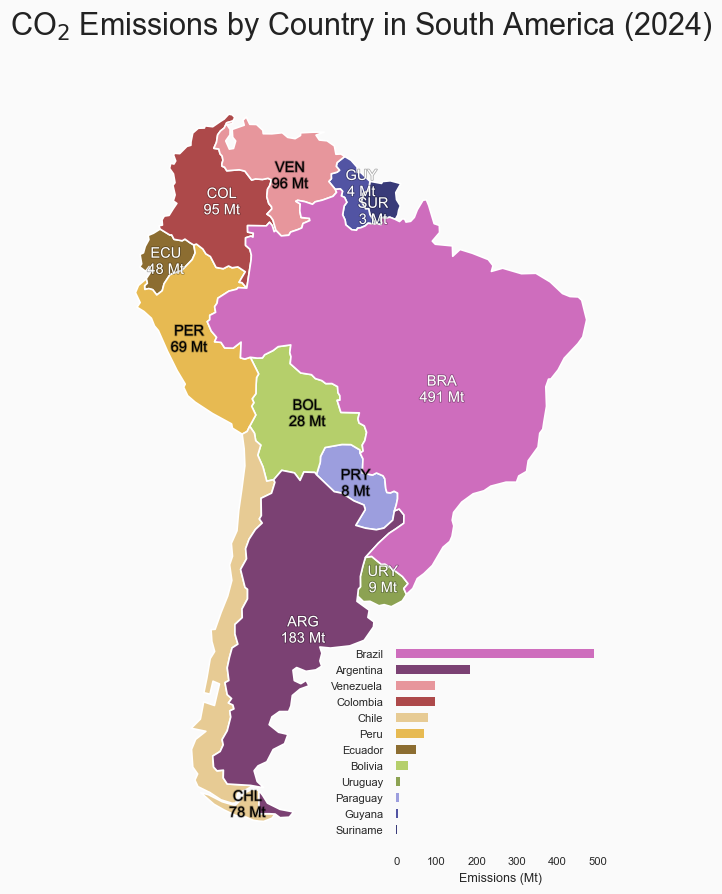

In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm

# ===============================
# Load data from Excel file
# ===============================
# Reads the Excel sheet named “fossil_CO2_totals_by_country”
# which contains CO₂ emissions per country per year.
file_path = "../Datos/EDGAR_2025_GHG_booklet_2025_fossilCO2only.xlsx"
sheet_name = "fossil_CO2_totals_by_country"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# ===============================
# Filter only South American countries
# ===============================
# We create a list of South American countries and keep
# only their emission values for 2024.
south_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]
df_south = df[df["Country"].isin(south_america)][["Country", 2024]].rename(columns={2024: "CO2"})

# ===============================
# Load the world map using GeoPandas
# ===============================
# The map is loaded from the Natural Earth dataset (in GeoJSON format).
# Then we extract only the South American continent and merge
# the geographic information with the CO₂ emission data.
world = gpd.read_file(
    "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
)
geo = world[world["CONTINENT"] == "South America"].merge(df_south, how="left", left_on="NAME_EN", right_on="Country")

# ===============================
# Assign unique colors using tab20
# ===============================
# The colormap "tab20b" provides up to 20 easily distinguishable colors.
# Each country will receive a unique color from this palette.
cmap = cm.get_cmap('tab20b', len(geo))

# Drop countries with missing CO₂ values and reset index
geo = geo.dropna(subset=["CO2"]).reset_index(drop=True)

# ===============================
# Sort geo dataframe by CO2 emissions
# ===============================
geo_sorted = geo.sort_values(by="CO2", ascending=True)  # Sort countries by CO2 emissions

# Assign a color from the colormap to each country
geo_sorted["color"] = [cmap(i) for i in range(len(geo_sorted))]  # Assign colors to the sorted dataframe

# ===============================
# Create the main figure
# ===============================
# The map is drawn with soft background color and white borders.
fig, ax = plt.subplots(figsize=(14, 9))
fig.patch.set_facecolor("#fafafa")

geo_sorted.plot(color=geo_sorted["color"], linewidth=1.2, edgecolor="white", ax=ax)

# ===============================
# Determine label color dynamically
# ===============================
# This function calculates the perceived brightness (luminance)
# of each country's color and automatically chooses black or white text
# for optimal readability.
def get_text_color(country):
    country_color = geo_sorted.loc[geo_sorted['Country'] == country, 'color'].values[0]
    r, g, b, _ = country_color
    luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return "black" if luminance > 0.6 else "white"

# ===============================
# Add country labels to the map
# ===============================
# Labels are placed at the centroid of each country shape.
# Some are slightly offset to prevent overlap.
label_offsets = {
    "GUY": (0.8, 0.8),
    "SUR": (-0.8, -0.8)
}

for _, row in geo_sorted.iterrows():
    if pd.isna(row["CO2"]):
        continue
    centroid = row["geometry"].representative_point()
    iso = row["ISO_A3"]
    dx, dy = label_offsets.get(iso, (0, 0))
    label = f"{iso}\n{row['CO2']:.0f} Mt"  # ISO code and emission value (in megatonnes)
    color_text = get_text_color(row["Country"])
    ax.text(
        centroid.x + dx, centroid.y + dy, label,
        ha="center", va="center", fontsize=10.5,
        color=color_text,
        path_effects=[path_effects.withStroke(linewidth=1.2, foreground="black", alpha=0.3)]
    )

# --- Map title and formatting ---
ax.set_title(
    "CO$_2$ Emissions by Country in South America (2024)",
    fontsize=22, color="#222", pad=20
)
ax.axis("off")

# Automatically adjust the map limits to include all countries nicely
bounds = geo_sorted.total_bounds
ax.set_xlim(bounds[0] - 5, bounds[2] + 5)
ax.set_ylim(bounds[1] - 5, bounds[3] + 5)

# ===============================
# Add the inset barplot (bottom-right corner)
# ===============================
# The barplot compares emission magnitudes between countries.
# It’s embedded inside the same figure using inset_axes().
ax_inset = inset_axes(ax, width="38%", height="25%", loc="lower right", borderpad=2)

# Sort countries by CO₂ emissions (ascending)
bar_colors = geo_sorted["color"]

# Horizontal barplot with the same color as the map
ax_inset.barh(geo_sorted["Country"], geo_sorted["CO2"], color=bar_colors, edgecolor="none", height=0.55)

# --- Barplot style adjustments ---
ax_inset.set_facecolor("#fafafa")
ax_inset.tick_params(axis="x", labelsize=8)
ax_inset.tick_params(axis="y", labelsize=8)
ax_inset.set_xlabel("Emissions (Mt)", fontsize=9, labelpad=4)
ax_inset.set_ylabel("", fontsize=9)

# Remove unnecessary borders
for spine in ["top", "right", "left", "bottom"]:
    ax_inset.spines[spine].set_visible(False)

ax_inset.grid(False)

# ===============================
# Save and display the final figure
# ===============================
# The final image is exported at high resolution (300 dpi)
# and displayed on screen.
plt.tight_layout()
plt.savefig("../Graphs/mapa_CO2_Sudamerica.png", dpi=300, bbox_inches="tight")
plt.show()

Al analizar las emisiones de CO₂ por país, es importante poner a Colombia como un control en el contexto global, ya que es el país en el que residimos. En 1970, las emisiones de Colombia eran significativamente bajas en comparación con los grandes emisores como Estados Unidos y Rusia. Este gráfico refleja cómo las emisiones de CO₂ en Colombia se ubicaban en un rango mucho menor que las de los países industrializados, lo que subraya su papel secundario en el contexto de las emisiones globales de esa época.
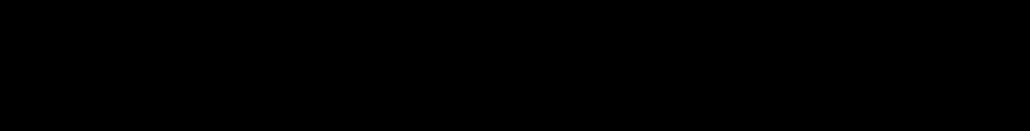

Font 'default' does not have a glyph for '\u2082' [U+2082], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2082' [U+2082], substituting with a dummy symbol.


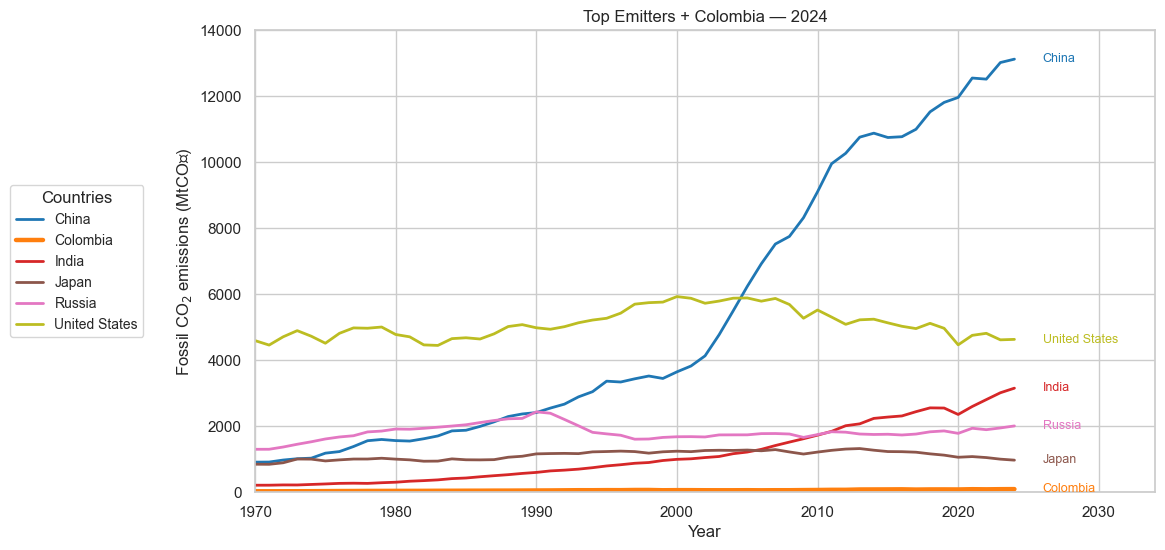

<Figure size 640x480 with 0 Axes>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# --------------------------------------------------------------
# Load dataset
# --------------------------------------------------------------
# The dataset comes from the EDGAR (Emissions Database for Global Atmospheric Research)
# fossil CO₂ emissions report. It contains annual emission totals by country.
EXCEL_PATH = "../Datos/EDGAR_2025_GHG_booklet_2025_fossilCO2only.xlsx"
SHEET = "fossil_CO2_totals_by_country"

# Read the Excel sheet into a DataFrame
df = pd.read_excel(EXCEL_PATH, sheet_name=SHEET)

# --------------------------------------------------------------
# Clean and standardize column names
# --------------------------------------------------------------
# Convert all column names to lowercase, remove extra spaces,
# and replace spaces with underscores for easier referencing.
df.columns = [str(col).strip().lower().replace(" ", "_") for col in df.columns]

# --------------------------------------------------------------
# Reshape dataset: wide → long format
# --------------------------------------------------------------
# Each column representing a year is converted into rows, creating
# a tidy dataset with 'year' and 'fossil_co2_total' columns.
df_long = df.melt(
    id_vars=["substance", "edgar_country_code", "country"],
    value_vars=[col for col in df.columns if col.isdigit()],
    var_name="year",
    value_name="fossil_co2_total"
)

# Convert 'year' to numeric type
df_long["year"] = pd.to_numeric(df_long["year"])

# Keep only CO₂ data (exclude other GHGs, if any)
df_long = df_long[df_long["substance"] == "CO2"].dropna(subset=["fossil_co2_total"])

# --------------------------------------------------------------
# Select specific countries for visualization
# --------------------------------------------------------------
# Focus on top global emitters and Colombia for regional comparison.
selected_countries = ["United States", "China", "India", "Russia", "Japan", "Colombia"]

df_long = df_long[df_long["country"].isin(selected_countries)]
df_long = df_long.sort_values(by=["year", "country"])

# Filter out negative or missing emission values
df_long = df_long[df_long["fossil_co2_total"] > 0]

# --------------------------------------------------------------
# Create the figure and define axis parameters
# --------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(df_long["year"].min(), df_long["year"].max() + 10)
ax.set_ylim(-0.5, 14000)  # Set consistent Y-axis limit across frames
ax.set_xlabel("Year")
ax.set_ylabel("Fossil CO$_2$ emissions (MtCO$_2$)")
ax.set_title("CO$_2$ Emissions — Top Emitters in America + Global Trend")

# --------------------------------------------------------------
# Assign unique colors to each country
# --------------------------------------------------------------
# Using the 'tab10' colormap for visual distinction between countries.
cmap = plt.colormaps.get_cmap("tab10")
countries = df_long["country"].unique()
colors = [cmap(i / len(countries)) for i in range(len(countries))]

# --------------------------------------------------------------
# Initialize line objects and text labels for each country
# --------------------------------------------------------------
# Each country has:
#   - A line representing its emissions over time
#   - A label showing its name near the end of the line
lines, labels = {}, {}

for i, country in enumerate(countries):
    # Highlight Colombia with a thicker line
    style = {"color": colors[i], "lw": 2} if country != "Colombia" else {"color": colors[i], "lw": 3.2}
    line, = ax.plot([], [], label=country, **style)
    lines[country] = line
    labels[country] = ax.text(df_long["year"].max() + 2, 0, "", fontsize=9, color=style["color"], va="center")

# --------------------------------------------------------------
# Static legend (fixed position)
# --------------------------------------------------------------
ax.legend(loc="center left", bbox_to_anchor=(-0.28, 0.5), fontsize="small", title="Countries")
plt.subplots_adjust(left=0.18, right=0.93)

# Extract all unique years (frames for animation)
years = sorted(df_long["year"].unique())

# --------------------------------------------------------------
# Helper function: adjust label positions
# --------------------------------------------------------------
def ordenar_etiquetas(posiciones):
    """
    Prevents label overlap by slightly shifting them vertically
    when they are too close to each other at the end of the animation.
    """
    posiciones_ordenadas = sorted(posiciones, key=lambda x: x[1])
    separacion_min = 0.03 * ax.get_ylim()[1]

    for i in range(1, len(posiciones_ordenadas)):
        if posiciones_ordenadas[i][1] - posiciones_ordenadas[i - 1][1] < separacion_min:
            posiciones_ordenadas[i] = (
                posiciones_ordenadas[i][0],
                posiciones_ordenadas[i - 1][1] + separacion_min,
                posiciones_ordenadas[i][2]
            )

    return {p[2]: (p[0], p[1]) for p in posiciones_ordenadas}

# --------------------------------------------------------------
# Animation update function
# --------------------------------------------------------------
def update(frame):
    """
    Updates the plot for each frame (year):
      - Draws each country's emission line up to the current year.
      - Updates label positions and text dynamically.
    """
    year = years[frame]
    ax.set_title(f"Top Emitters + Colombia — {year}")

    posiciones = []
    for country in countries:
        data = df_long[df_long["country"] == country]
        past = data[data["year"] <= year]
        lines[country].set_data(past["year"], past["fossil_co2_total"])

        if not past.empty:
            x = past["year"].iloc[-1]
            y = past["fossil_co2_total"].iloc[-1]
            posiciones.append((x + 2, y, country))

    # In the final frame, fix label positions to prevent overlap
    if frame == len(years) - 1:
        ordenadas = ordenar_etiquetas(posiciones)
        for country, (x, y) in ordenadas.items():
            labels[country].set_position((x, y))
            labels[country].set_text(country)
    else:
        for (x, y, country) in posiciones:
            labels[country].set_position((x, y))
            labels[country].set_text(country)

    return list(lines.values()) + list(labels.values())

# --------------------------------------------------------------
# Generate the animation
# --------------------------------------------------------------
# Each frame corresponds to a year from the dataset.
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(years),
    interval=120,  # milliseconds between frames
    repeat=True
)

# --------------------------------------------------------------
# Export animation as GIF
# --------------------------------------------------------------
ani.save("../Graphs/CO2_TopEmitters_Colombia.gif", writer="pillow", fps=7)
plt.show()
# --------------------------------------------------------------
# Save final static image
# --------------------------------------------------------------
# Capture the last frame (latest year) for a publication-quality figure.
update(len(years) - 1)
plt.savefig("../Graphs/CO2_TopEmitters_Colombia_Final.jpg", dpi=400, bbox_inches="tight")




El análisis histórico de las emisiones de CO₂ y el uso de Colombia como control en este estudio permite observar la evolución de las emisiones no solo a nivel global, sino también en un contexto nacional. Mientras Colombia comienza con emisiones relativamente bajas en 1970, los datos actuales muestran un aumento proporcional a su crecimiento industrial y económico. Sin embargo, la comparación con los grandes emisores, como China y Estados Unidos, muestra que el país sigue teniendo una huella de carbono considerablemente más baja en relación con estos. Esta comparación subraya la necesidad de estrategias diferenciadas para países en vías de desarrollo, como Colombia, que enfrentan el reto de mejorar su economía sin comprometer el medio ambiente.
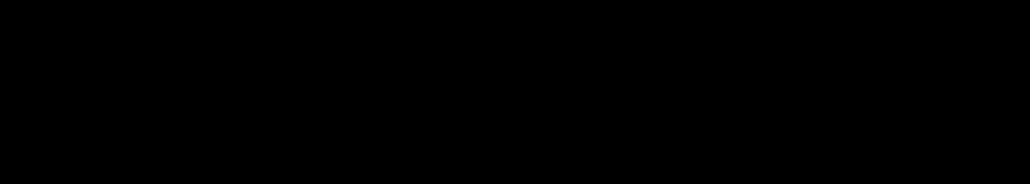